In [2]:
#Carga de librerías#
import pandas as pd
import numpy as np
import geopandas as gdp
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
# otras librerias
from datetime import datetime
import matplotlib.pyplot as matplt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)
import re
import time
import datetime 

In [3]:
#pip install cufflinks 

In [4]:
map_whit_clusters = folium.Map(location=[-34.08, -73.288], zoom_start=4)
map_whit_clusters

In [6]:
#Lee el archivo...
data_BESS = pd.read_csv("tarea_2_csv/only_BESS.csv",sep = ";")# error_bad_lines=False)

#visualización de las columnas:
print("Columnas: \n",data_BESS.columns)

print("\n")
#veamos las empresas:
print("Empresas con sistemas BESS:\n",data_BESS['Empresa Solicitante'].unique())


data_BESS.dtypes


Columnas: 
 Index(['Index', 'Id', 'Proyecto', 'NUP', 'Empresa Solicitante', 'Tipo',
       'Estado Solicitud', 'Fecha Recepción', 'Capacidad [MW]',
       'Tipo Proyecto', 'Sólo BESS', 'BESS+Solar', 'BESS+Eólico',
       'Capacidad BESS (MW)', 'Cap. BESS + Solar (MWh)',
       'Cap. BESS+ Eolico (MWh)', 'Número de Hrs almacenamiento',
       'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión',
       'Fecha emisión informe definitivo',
       'Plazo obtención declaración en const',
       'Prórroga plazo obtención declaración en const.'],
      dtype='object')


Empresas con sistemas BESS:
 ['BESS El Salado SpA.' 'Colbún S.A.' 'Solarpack Chile Limitada'
 'Energy Head SpA' 'BESS del Desierto SpA' 'Cielpanel SpA'
 'JINKO POWER CHILE SPA ' 'oEnergy Development SpA' 'BIWO Renovables S.A.'
 'Engie Energía Chile S.A. ' 'CI NMF I Arena ProjectCo SpA'
 'Ríos Nueva Pozo Almonte SpA' 'Enel Green Power del Sur '

Index                                               int64
Id                                                  int64
Proyecto                                           object
NUP                                               float64
Empresa Solicitante                                object
Tipo                                               object
Estado Solicitud                                   object
Fecha Recepción                                    object
Capacidad [MW]                                    float64
Tipo Proyecto                                      object
Sólo BESS                                          object
BESS+Solar                                         object
BESS+Eólico                                        object
Capacidad BESS (MW)                               float64
Cap. BESS + Solar (MWh)                           float64
Cap. BESS+ Eolico (MWh)                           float64
Número de Hrs almacenamiento                      float64
Fecha Estimada

In [7]:
data_BESS.columns

data_BESS_filtrada = data_BESS[["Index","Proyecto","Empresa Solicitante","Tipo","Estado Solicitud",
                               "Fecha Recepción","Capacidad [MW]",
                                'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión']]
#data_BESS_filtrada

data_BESS_filtrada.head(2)

,Index,Proyecto,Empresa Solicitante,Tipo,Estado Solicitud,Fecha Recepción,Capacidad [MW],Fecha Estimada Conexión,Punto de Conexión,Nivel de tension,Barra,Paño,Región,Comuna,Segmento de Transmisión
0,1,BESS Tambillo,BESS El Salado SpA.,SAC,Solicitud Ingresada,20 de octubre de 2023 20:35,405.0,29 de diciembre de 2027 00:00,S/E Nueva Pozo Almonte 220kV,220,Barra 2,JX,Tarapacá,Pozo Almonte,Nacional
1,2,BESS ALTILIUM,Colbún S.A.,SAC,Solicitud Ingresada,20 de octubre de 2023 13:20,200.0,1 de diciembre de 2030 00:00,S/E Cumbre 220 kV,220,Barra 2,J12,Atacama,Diego de Almagro,Nacional


In [8]:
#Datos a analizar:
#numero de proyectos que posee cada empresa solicitantes.
#capacidad instalada de almacenamiento BESS x Región.
#Como se distribuyen los proyectos en las regiones.

# 1. Número de proyectos que posee cada empresa solicitante y capacidad de almacenamiento BESS (MW)

In [9]:
proyectos_por_empresa = data_BESS_filtrada.groupby(["Empresa Solicitante"])["Proyecto"].count()
print("Total de proyectos BESS:",sum(proyectos_por_empresa))
proyectos_por_empresa

Total de proyectos BESS: 52


Empresa Solicitante
Aes Chile Inversiones Renovables SpA     1
AustrianSolar Chile Cuatro SpA           1
BESS Charruana SpA                       1
BESS El Salado SpA.                      1
BESS Metropolitana SpA                   1
BESS Pueblo Hundido SpA                  1
BESS del Desierto SpA                    1
BIWO Renovables S.A.                     2
CI NMF I Arena ProjectCo SpA             1
Cielpanel SpA                            3
Colbún S.A.                              2
Enel Green Power del Sur                 3
Energy Head SpA                          1
Engie Energía Chile S.A.                 1
Enlasa Generación Chile S.A.             1
Grenergy Renovables Pacific Limitada     3
JINKO POWER CHILE SPA                    1
Parque Eólico Quillagua SpA              1
Punta del Sol SpA                        1
Ríos Nueva Pozo Almonte SpA              1
Solarpack Chile Limitada                 4
oEnergy Development SpA                 20
Name: Proyecto, dtype: int64

Empresa con mayor número de BESS:
1. oEnergy Development SpA = 20 PROYECTOS BESS
2. Solarpack Chile = 4 PROYECTOS BESS
3. Enel Green Power del Sur/ Cielpanel SpA /Grenergy Renovables Pacific Limitada = 3 PROYECTOS BESS


In [10]:
#Capacidad de almacenamiento por empresa:

In [11]:
capacidad_almacenamiento_por_empresa = data_BESS_filtrada.groupby(["Empresa Solicitante"])["Capacidad [MW]"].sum()
capacidad_almacenamiento_por_empresa

Empresa Solicitante
Aes Chile Inversiones Renovables SpA     400.0
AustrianSolar Chile Cuatro SpA            98.0
BESS Charruana SpA                       200.0
BESS El Salado SpA.                      405.0
BESS Metropolitana SpA                   200.0
BESS Pueblo Hundido SpA                  405.0
BESS del Desierto SpA                    200.0
BIWO Renovables S.A.                      40.0
CI NMF I Arena ProjectCo SpA             270.0
Cielpanel SpA                             40.0
Colbún S.A.                              440.0
Enel Green Power del Sur                 360.0
Energy Head SpA                           40.0
Engie Energía Chile S.A.                  30.0
Enlasa Generación Chile S.A.               1.2
Grenergy Renovables Pacific Limitada     270.0
JINKO POWER CHILE SPA                    150.0
Parque Eólico Quillagua SpA               95.0
Punta del Sol SpA                        300.0
Ríos Nueva Pozo Almonte SpA              125.0
Solarpack Chile Limitada                

In [12]:
#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_numero_proyectos_por_empresa = pd.DataFrame(proyectos_por_empresa)

#DF capacidad instalada almacenamiento por empresa:
df_capacidad_almacenamiento_por_empresa = pd.DataFrame(capacidad_almacenamiento_por_empresa)

#Merge de los datos:
df_merge_datos_1 = pd.merge(df_numero_proyectos_por_empresa,
                            df_capacidad_almacenamiento_por_empresa,
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')


df_merge_datos_1.rename(columns={"Proyecto": "Número de proyectos BESS"},inplace = True)

#df_merge_datos_1['Capacidad [MW]'].sum()

#mayor capacidad instalada: 
mayor_capacidad = df_merge_datos_1.sort_values('Capacidad [MW]',ascending=False)
print("capacidad instalada total:",mayor_capacidad["Capacidad [MW]"].sum())

mayor_capacidad



capacidad instalada total: 6051.2


,Número de proyectos BESS,Capacidad [MW]
Empresa Solicitante,,
oEnergy Development SpA,20,1195.0
Solarpack Chile Limitada,4,787.0
Colbún S.A.,2,440.0
BESS Pueblo Hundido SpA,1,405.0
BESS El Salado SpA.,1,405.0
Aes Chile Inversiones Renovables SpA,1,400.0
Enel Green Power del Sur,3,360.0
Punta del Sol SpA,1,300.0
CI NMF I Arena ProjectCo SpA,1,270.0


In [13]:
#Observaciones:
#Empresa con mayor número de BESS:

#1.oEnergy Development SpA = 20 PROYECTOS BESS
#2.Solarpack Chile = 4 PROYECTOS BESS
#3. Enel Green Power del Sur/ Cielpanel SpA /Grenergy Renovables Pacific Limitada = 3 PROYECTOS BESS

#Total número de proyectos = 52.

#Empresa con mayor capacidad instalada BESS (MW):
#1.oEnergy Development SpA = 1195 MW
#2.Solarpack Chile Limitada = 787 MW.
#3.Colbún S.a = 440 MW.


## 2. Como se distribuyen los proyectos en las regiones.

In [14]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna = data_BESS_filtrada.groupby(["Región", "Comuna","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_comuna

Región                                Comuna                Capacidad [MW]  Empresa Solicitante                 
Antofagasta                           Antofagasta           100.0           Solarpack Chile Limitada                1
                                      Maria Elena           95.0            Parque Eólico Quillagua SpA             1
                                                            150.0           Enel Green Power del Sur                1
                                                            200.0           BESS del Desierto SpA                   1
                                                            250.0           oEnergy Development SpA                 1
                                      Mejillones            15.0            Cielpanel SpA                           1
                                                            300.0           Punta del Sol SpA                       1
                                      San Pedro de Atacama  1

In [15]:
#Como se distribuyen los proyectos en las regiones.
distribucion_region = data_BESS_filtrada.groupby(["Región","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_region

Región                                Capacidad [MW]  Empresa Solicitante                 
Antofagasta                           15.0            Cielpanel SpA                           1
                                      95.0            Parque Eólico Quillagua SpA             1
                                      100.0           Solarpack Chile Limitada                1
                                      150.0           Enel Green Power del Sur                2
                                      200.0           BESS del Desierto SpA                   1
                                      250.0           oEnergy Development SpA                 1
                                      270.0           CI NMF I Arena ProjectCo SpA            1
                                      300.0           Punta del Sol SpA                       1
Arica y Parinacota                    10.0            oEnergy Development SpA                 1
                                      17.0   

In [16]:
#capacidad instalada de almacenamiento BESS x Región
analisis_region = data_BESS_filtrada.groupby(["Región"])["Capacidad [MW]"].sum()
analisis_region
#Transforma el groupby en un dataframe:
#DF capacidad instalada por región:
df_capacidad = pd.DataFrame(analisis_region)
df_capacidad

# número de proyectos por región 
numero_empresas_por_region = data_BESS_filtrada.groupby(["Región"])['Empresa Solicitante'].count()
numero_empresas_por_region
#Transforma el groupby en un dataframe:
#Número de empresas que instalaron BESS por región.
df = pd.DataFrame(numero_empresas_por_region)

#Une los 2 dataframe (capacidad instalda región + número de proyectos región)
df_merge_datos = pd.merge(df_capacidad, df, left_on='Región', right_on='Región')
#Cambia el nombre a la columna
df_merge_datos.rename(columns={"Empresa Solicitante": "Número de proyectos BESS"},inplace = True)
df_merge_datos
#Ordena el orden de las columnas que entregan la información.
data_ordenada = df_merge_datos[["Número de proyectos BESS","Capacidad [MW]"]]

#mayor capacidad instalada: 
#Ordena la información de forma descendente en función de la capacidad instalada.
capacidad_instalada_por_region = data_ordenada.sort_values('Capacidad [MW]',ascending=False)
capacidad_instalada_por_region

#Agrego los valores para el análisis conjunto:
capacidad_instalada_por_region['Número de proyectos BESS+Solar'] = [1,1,1,0,0,0,0,1,0,2,0]
capacidad_instalada_por_region['Capacidad BESS_solar [MW]'] = [200,100,45,0,0,0,0,67,0,124,0]
capacidad_instalada_por_region["Número de proyectos BESS+Wind"] = [1,0,0,1,0,0,0,0,0,0,0]
capacidad_instalada_por_region['Capacidad BESS_wind [MW]'] = [63,0,0,70,0,0,0,0,0,0,0]
capacidad_instalada_por_region

capacidades_regiones_finales = capacidad_instalada_por_region.rename(columns={"Número de proyectos BESS": "# BESS",
                                                     "Capacidad [MW]": "Cap.[MW]",
                                                     "Número de proyectos BESS+Solar": "# BESS+Solar",
                                                     "Capacidad BESS_solar [MW]":"Cap.BESS+Solar[MW]",
                                                     "Número de proyectos BESS+Wind":"# BESS+Wind",
                                                     "Capacidad BESS_wind [MW]":"Cap.BESS+Wind[MW]"},inplace = True)

#auxiliares para almacenar el # total de proyectos y cap. total.
aux_nr_proyectos = []
aux_capacidad_proyectos = []

#recorre todos los elementos para sumar # de projectos y capacidad.
for i in range(len(capacidad_instalada_por_region['# BESS'])):
    total_proyectos_region = (capacidad_instalada_por_region['# BESS'][i] +capacidad_instalada_por_region['# BESS+Solar'][i]+
                            capacidad_instalada_por_region['# BESS+Wind'][i])
    total_capacidad_region = (capacidad_instalada_por_region['Cap.[MW]'][i]+
                              capacidad_instalada_por_region['Cap.BESS+Solar[MW]'][i]+
                             capacidad_instalada_por_region['Cap.BESS+Wind[MW]'][i])
    
    #incorpora la suma al arreglo auxiliar
    aux_nr_proyectos.append(total_proyectos_region)
    aux_capacidad_proyectos.append(total_capacidad_region)
    
aux_nr_proyectos
aux_capacidad_proyectos


capacidad_instalada_por_region["Total project"] = aux_nr_proyectos
capacidad_instalada_por_region["Total Capacity BESS (MW)"] = aux_capacidad_proyectos
#capacidad_instalada_por_region["Total Cap. (MW)"] = sum(capacidad_instalada_por_region['Cap.[MW]']+
#                                                  capacidad_instalada_por_region['Cap.BESS+Solar[MW]']+
#                                                  capacidad_instalada_por_region['Cap.BESS+Wind[MW]'])

#a = capacidad_instalada_por_region['Cap.[MW]'][0] + capacidad_instalada_por_region["Cap.BESS+Solar[MW]"][0]
capacidad_instalada_por_region
capacidad_instalada_por_region["Total Capacity BESS (MW)"].sum()

6720.2

In [17]:
#Obs:
#Mayor capacidad instalada de BESS al norte del país.
#Región con mayor capacidad BESS: 
#1. Antofagasta: 1530 MW.
#2. Atacama: 1253 MW.
#3. Tarapacá: 1174 MW.

# 3. Análisis estadístico de los proyectos en las regiones.

In [18]:
#Visualización del dataframe filtrado:
print("Columnas :\n ",data_BESS_filtrada.columns)


Columnas :
  Index(['Index', 'Proyecto', 'Empresa Solicitante', 'Tipo', 'Estado Solicitud',
       'Fecha Recepción', 'Capacidad [MW]', 'Fecha Estimada Conexión',
       'Punto de Conexión', 'Nivel de tension', 'Barra', 'Paño', 'Región',
       'Comuna', 'Segmento de Transmisión'],
      dtype='object')


In [19]:
#Regiones que poseen BESS
data_BESS_filtrada['Región'].unique()

regiones_con_BESS = data_BESS_filtrada['Región'].unique()
regiones_con_BESS
lista_Regiones_BESS = regiones_con_BESS.tolist()

In [20]:
#Segmentación de la base de datos por región:
#Tarapacá
BESS_R_tarapaca = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[0]]
#Reset index:
BESS_R_tarapaca = BESS_R_tarapaca.reset_index(drop=True)
#ATACAMA
BESS_R_atacama = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[1]]
#Reset index:
BESS_R_atacama = BESS_R_atacama.reset_index(drop=True)
#ARICA
BESS_R_arica_parinacota = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[2]]
#Reset index:
BESS_R_arica_parinacota = BESS_R_arica_parinacota.reset_index(drop=True)
#ANTOFAGASTA
BESS_R_antofagasta = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[3]]
#Reset index:
BESS_R_antofagasta = BESS_R_antofagasta.reset_index(drop=True)
#METROPOLITANA
BESS_R_metropolitana = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[4]]
#Reset index:
BESS_R_metropolitana = BESS_R_metropolitana.reset_index(drop=True)
#VALPARAISO
BESS_R_valparaiso = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[5]]
#Reset index:
BESS_R_valparaiso = BESS_R_valparaiso.reset_index(drop=True)
#LOS LAGOS:
BESS_R_los_lagos = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[6]]
#Reset index:
BESS_R_los_lagos = BESS_R_los_lagos.reset_index(drop=True)
#LIBERTADOR BERNARDO OHIGGINS
BESS_R_libertador_ohiggins = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[7]]
#Reset index:
BESS_R_libertador_ohiggins = BESS_R_libertador_ohiggins.reset_index(drop=True)

#BIO BIO
BESS_R_biobio = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[8]]
#Reset index:
BESS_R_biobio = BESS_R_biobio.reset_index(drop=True)

#Coquimbo:
BESS_R_Coquimbo = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[9]]
#Reset index:
BESS_R_Coquimbo = BESS_R_Coquimbo.reset_index(drop=True)

#Maule:
BESS_R_Maule = data_BESS_filtrada.loc[data_BESS_filtrada['Región'] == lista_Regiones_BESS[10]]
#Reset index:
BESS_R_Maule = BESS_R_Maule.reset_index(drop=True)


In [21]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna_agregado = data_BESS_filtrada.groupby(["Región", "Comuna"])["Capacidad [MW]"].sum()
distribucion_comuna_agregado

Región                                Comuna              
Antofagasta                           Antofagasta              100.0
                                      Maria Elena              695.0
                                      Mejillones               315.0
                                      San Pedro de Atacama     150.0
                                      Taltal                   270.0
Arica y Parinacota                    Arica                    257.0
                                      Camarones                240.0
Atacama                               Copiapó                  418.0
                                      Diego de Almagro         820.2
                                      Huasco                    15.0
Biobío                                Cabrero                  200.0
                                      Coronel                   90.0
                                      Hualqui                   90.0
Coquimbo                              Coquim

In [22]:
#Distribución general de todas las regiones:
data_BESS_filtrada['Capacidad [MW]'].describe()


count     52.000000
mean     116.369231
std      113.347111
min        1.200000
25%       25.750000
50%       67.000000
75%      200.000000
max      405.000000
Name: Capacidad [MW], dtype: float64

In [23]:
#DF distribución general regiones:
distribucion_general_regiones = np.round(data_BESS_filtrada['Capacidad [MW]'].describe(),decimals = 2)
df_distribucion_general_regiones = pd.DataFrame(distribucion_general_regiones)

#Rename:
df_distribucion_general_regiones.rename(columns={"Capacidad [MW]": "distribution in all regions"},inplace = True)

#Incorpora las demás regiones en el df_distribucion_general_regiones:

#Tarapacá:
df_distribucion_general_regiones['Distribution Tarapacá'] = np.round(BESS_R_tarapaca['Capacidad [MW]'].describe(),decimals = 2)
#Atacama:
df_distribucion_general_regiones['Distribution Atacama'] = np.round(BESS_R_atacama['Capacidad [MW]'].describe(),decimals = 2)
#Arica y Parinacota:
df_distribucion_general_regiones['Distribution Arica y Parinacota'] = np.round(BESS_R_arica_parinacota['Capacidad [MW]'].describe(),decimals = 2)
#Antofagasta:
df_distribucion_general_regiones['Distribution Antofagasta'] = np.round(BESS_R_antofagasta['Capacidad [MW]'].describe(),decimals = 2)
#Metropolitana de Santiago:
df_distribucion_general_regiones['Distribution Santiago of Chile'] = np.round(BESS_R_metropolitana['Capacidad [MW]'].describe(),decimals = 2)
#Valparaiso
df_distribucion_general_regiones['Distribution Valparaiso'] = np.round(BESS_R_valparaiso['Capacidad [MW]'].describe(),decimals = 2)
#Los Lagos
df_distribucion_general_regiones['Distribution Los Lagos'] = np.round(BESS_R_los_lagos['Capacidad [MW]'].describe(),decimals = 2)
#Libertador General Bernardo OHiggins
df_distribucion_general_regiones["Distribution Libertador General Bernardo O'higgins"] = np.round(BESS_R_libertador_ohiggins['Capacidad [MW]'].describe(),decimals = 2)
#Biobío
df_distribucion_general_regiones["Distribution Biobío"] = np.round(BESS_R_biobio['Capacidad [MW]'].describe(),decimals = 2)
#Coquimbo
df_distribucion_general_regiones["Distribution Coquimbo"] = np.round(BESS_R_Coquimbo['Capacidad [MW]'].describe(),decimals = 2)
#Maule
df_distribucion_general_regiones["Distribution Maule"] = np.round(BESS_R_Maule['Capacidad [MW]'].describe(),decimals = 2) 

#ALL regiones.
df_distribucion_general_regiones


,distribution in all regions,Distribution Tarapacá,Distribution Atacama,Distribution Arica y Parinacota,Distribution Antofagasta,Distribution Santiago of Chile,Distribution Valparaiso,Distribution Los Lagos,Distribution Libertador General Bernardo O'higgins,Distribution Biobío,Distribution Coquimbo,Distribution Maule
count,52.00,7.00,14.00,5.00,9.00,3.00,3.00,1.0,1.0,3.00,5.00,1.0
mean,116.37,167.71,89.51,99.40,170.00,100.00,88.67,20.0,20.0,126.67,116.60,28.0
std,113.35,141.37,123.26,111.23,93.24,87.18,62.01,NaN,NaN,63.51,159.79,NaN
min,1.20,9.00,1.20,10.00,15.00,40.00,26.00,20.0,20.0,90.00,12.00,28.0
25%,25.75,74.00,17.00,17.00,100.00,50.00,58.00,20.0,20.0,90.00,50.00,28.0
50%,67.00,125.00,39.50,30.00,150.00,60.00,90.00,20.0,20.0,90.00,52.00,28.0
75%,200.00,243.50,63.75,200.00,250.00,130.00,120.00,20.0,20.0,145.00,69.00,28.0
max,405.00,405.00,405.00,240.00,300.00,200.00,150.00,20.0,20.0,200.00,400.00,28.0


Text(0.5, 1.0, "BESS infrastructure, Chile's regions")

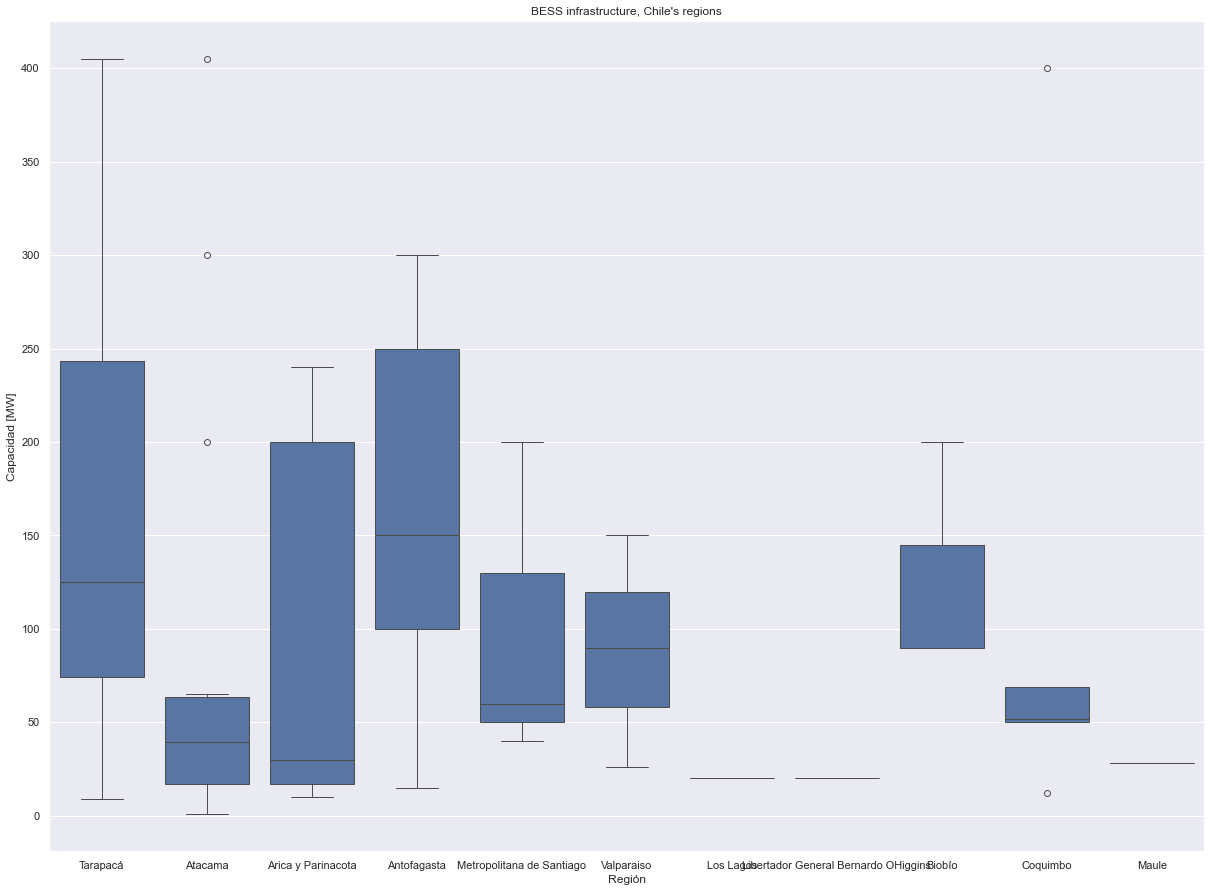

In [24]:
#plt.boxplot(x = BESS_R_tarapaca['Capacidad [MW]'], vert = False)

sns.set_style('whitegrid')

sns.set(rc={'figure.figsize':(20.7,15.27)}) #set width and height

ax = sns.boxplot(x='Región',y='Capacidad [MW]',
                data=data_BESS_filtrada)

ax.set_title("BESS infrastructure, Chile's regions")

##### Agrupación de proyectos según punto de conexión

In [25]:
puntos_conexion = data_BESS_filtrada.groupby(["Región","Comuna","Punto de Conexión"])["Proyecto"].count()
puntos_conexion


Región                                Comuna                Punto de Conexión                                  
Antofagasta                           Antofagasta           S/E Uribe 110 kV                                       1
                                      Maria Elena           S/E PE Quillagua 23 kV                                 1
                                                            S/E Sol del Desierto 33 kV                             1
                                                            S/E Valle del Sol 33 kV                                1
                                                            SE Crucero 220 kV                                      1
                                      Mejillones            S/E Cochrane 220 kV                                    1
                                                            S/E Muelle 23 kV                                       1
                                      San Pedro de Atacama  S/E Sol d

In [26]:
#OBS: 
#Unicos proyectos que repiten punto de conexión:
#S/E Nueva Pozo Almonte 220 kV: 2 proyectos.
#S/E Cumbre 220 kV: 2 proyectos.

In [27]:
#Plots!:

In [28]:
#Plot del Dataframe:
#df_capacidad.iplot(kind = 'bar',xTitle = 'Region',
#             yTitle = "Capacity install (MW)",title = 'Number of projects by region (Chile)',
#        )

#Transforma el groupby en un dataframe:
df = pd.DataFrame(numero_empresas_por_region)
df
#Plot del Dataframe:
df.iplot(kind = 'bar',xTitle = 'Region',
             yTitle = "Number of projects (BESS)",title = 'Number of projects by region (Chile)',
        )

#### Análisis total datos con información BESS(BESS+BESS_Solar+BESS_Wind)
#### Total = 60 proyectos.


In [31]:
#Lectura de data filtrada BESS+Solar:
data_BESS_plus_solar_filtrada = pd.read_csv("tarea_2_csv/output_data_BESS_and_solar_filtrada.csv",sep = ",")
data_BESS_plus_solar_filtrada.head()
#Lectura de data filtrada BESS+Wind:
data_BESS_plus_wind_filtrada = pd.read_csv("tarea_2_csv/output_data_BESS_and_wind_filtrada.csv",sep = ",")
data_BESS_plus_wind_filtrada.head()

#Concatena los dataframe para analizar.
frames = [data_BESS_plus_solar_filtrada,data_BESS_plus_wind_filtrada]
all_csv_unidos = pd.concat(frames)
all_csv_unidos
#Reset index:
all_csv_unidos = all_csv_unidos.reset_index(drop=True)


In [32]:
#Reset index:
data_BESS = data_BESS.reset_index(drop=True)
data_BESS

#Merge de los datos.
frames = [data_BESS,all_csv_unidos]
final_data_BESS = pd.concat(frames)

#Reset index:
final_data_BESS = final_data_BESS.reset_index(drop=True)
final_data_BESS.columns

final_data_BESS_filtrado = final_data_BESS[['Proyecto','Empresa Solicitante', 'Tipo',
                                           'Estado Solicitud', 'Fecha Recepción', 'Capacidad [MW]',
                                           'Sólo BESS', 'BESS+Solar', 'BESS+Eólico',
                                           'Capacidad BESS (MW)','Número de Hrs almacenamiento',
                                           'Fecha Estimada Conexión', 'Punto de Conexión', 
                                            'Nivel de tension',
        'Segmento de Transmisión']]
#final_data_BESS_filtrado[:3]
final_data_BESS_filtrado['Fecha Recepción']

data_analisis_grafico = final_data_BESS_filtrado[['Proyecto',
                                           'Estado Solicitud', 'Fecha Recepción','Capacidad BESS (MW)',
                                                'Fecha Estimada Conexión']]

#df final con información unida de los 3 df(BESS+BESS_solar+BESS_eolico)
data_analisis_grafico

,Proyecto,Estado Solicitud,Fecha Recepción,Capacidad BESS (MW),Fecha Estimada Conexión
0,BESS Tambillo,Solicitud Ingresada,20 de octubre de 2023 20:35,405.0,29 de diciembre de 2027 00:00
1,BESS ALTILIUM,Solicitud Ingresada,20 de octubre de 2023 13:20,200.0,1 de diciembre de 2030 00:00
2,BESS Saucache,Solicitud Ingresada,18 de octubre de 2023 14:07,200.0,30 de diciembre de 2028 00:00
3,BESS Nudo Norte,Solicitud Ingresada,17 de octubre de 2023 11:40,100.0,30 de diciembre de 2029 00:00
4,BESS Don Ignacio I,Solicitud Ingresada,17 de octubre de 2023 11:22,300.0,30 de junio de 2028 00:00
5,BESS El Aparecido,Solicitud ingresada,16 de octubre de 2023 13:09,40.0,31 de julio de 2026 00:00
6,BESS del Desierto,Proyecto ingresado,12 de octubre de 2023 14:37,200.0,31 de diciembre de 2025 00:00
7,PMG Patache +BESS,Solicitud ingresada,10 de octubre de 2023 20:16,9.0,30 de junio de 2025 00:00
8,BESS LA LIGUA ENERGIA 1,Evaluación Admisibilidad,4 de octubre de 2023 15:05,150.0,31 de diciembre de 2027 00:00
9,BESS Halcón 12,Evaluación de antecedentes y/o requerimientos,3 de octubre de 2023 19:37,250.0,30 de noviembre de 2026 00:00


In [33]:
#Guarda los años de las fechas estimadas de conexión a la red
aux_years = []
#Guarda los años ed las fehcas de recepción de los proyectos.
aux_years_2 = []
for i in range(len(data_analisis_grafico['Fecha Estimada Conexión'])):    
    #guarda el año de la fecha estimada de conexión
    una_fecha = data_analisis_grafico['Fecha Estimada Conexión'][i]
    #guarda el año de la fecha de recepción del proyecto
    una_fecha_2 = data_analisis_grafico['Fecha Recepción'][i]
    
    #PRINT de las fechas.
    #print(i,"una_fecha",una_fecha)
    
    #Busca el año del string que almacena la fecha
    busca_year = re.findall(r'\d*', una_fecha)
    busca_year_2 = re.findall(r'\d*', una_fecha_2)
    
    #recorre las fechas de recepción y guarda los años en el arreglo auxiliar.
    if '2021' in busca_year_2:
        aux_years_2.append(2021)
    if '2022' in busca_year_2:
        aux_years_2.append(2022)
    if '2023' in busca_year_2:
        aux_years_2.append(2023)
    
    
    #recorre las fechas estimadas de conexión y guarda los años en el arreglo auxiliar.
    if '2022' in busca_year:
        aux_years.append(2022)    
    if '2023' in busca_year:
        aux_years.append(2023)
    if '2024' in busca_year:
        aux_years.append(2024)
    if '2025' in busca_year:
        aux_years.append(2025)
    if '2026' in busca_year:
        aux_years.append(2026)
    if '2027' in busca_year:
        aux_years.append(2027)
    if '2028' in busca_year:
        aux_years.append(2028)
    if '2029' in busca_year:
        aux_years.append(2029)
    if '2030' in busca_year:
        aux_years.append(2030)
    if  una_fecha == 'Fecha inválida':
        aux_years.append(2050)
    

In [34]:
#Asigna los año de recepcion de proyectos a la columna year_recepcion
data_analisis_grafico['Year_recepcion'] = aux_years_2
#Asigna los año de conexion estimada de proyectos a la columna year_conexion
data_analisis_grafico['Year_conexion'] = aux_years


#data_analisis_grafico['Year_conexion'].max()

#final_data_BESS_filtrado['Estado Solicitud'].unique()

#3 categorías:
#1. Operación.
#2. Const/Autorización.
#3. Solicita Acceso.

#2023:
final_data_BESS_filtrado_2023 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2023]
##2024:
final_data_BESS_filtrado_2024 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2024]
###2025:
final_data_BESS_filtrado_2025 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2025]
##2026:
final_data_BESS_filtrado_2026 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2026]
##2027:
final_data_BESS_filtrado_2027 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2027]
##2028:
final_data_BESS_filtrado_2028 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2028]
##2029:
final_data_BESS_filtrado_2029 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2029]
##2030:
final_data_BESS_filtrado_2030 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2030]
##2050:
#final_data_BESS_filtrado_2050 = data_analisis_grafico.loc[data_analisis_grafico['Year_conexion'] == 2050]
final_data_BESS_filtrado_2030#['Capacidad BESS (MW)'].sum()


,Proyecto,Estado Solicitud,Fecha Recepción,Capacidad BESS (MW),Fecha Estimada Conexión,Year_recepcion,Year_conexion
1,BESS ALTILIUM,Solicitud Ingresada,20 de octubre de 2023 13:20,200.0,1 de diciembre de 2030 00:00,2023,2030


In [35]:
#Construcción Dataframe que contiene los elementos para el gráfico acumulado de la infraestructura
#entre solicitud,aut/constuccion, operacion.
categoria = ['Operation','Const/Autoriz','request access']

df_grafico_acumulado = pd.DataFrame()

df_grafico_acumulado['Category'] = categoria
df_grafico_acumulado['2023'] = [120,1.2,0]
df_grafico_acumulado['2024'] = [121.2,215,0]
df_grafico_acumulado['2025'] = [336.2,1487,209]
df_grafico_acumulado['2026'] = [2032.2,1514,40]
df_grafico_acumulado['2027'] = [3586.2,1350,472]
df_grafico_acumulado['2028'] = [5408.2,632,500]
df_grafico_acumulado['2029'] = [6540.2,0,100]
df_grafico_acumulado['2030'] = [6660.2,0,200]





In [36]:
df_grafico_acumulado


,Category,2023,2024,2025,2026,2027,2028,2029,2030
0,Operation,120.0,121.2,336.2,2032.2,3586.2,5408.2,6540.2,6660.2
1,Const/Autoriz,1.2,215.0,1487.0,1514.0,1350.0,632.0,0.0,0.0
2,request access,0.0,0.0,209.0,40.0,472.0,500.0,100.0,200.0


In [37]:
#Transpone el df para graficar.
dataframe1 = df_grafico_acumulado.transpose()
dataframe1.columns
#dataframe1[0]

RangeIndex(start=0, stop=3, step=1)

In [38]:
#Cambia el nombre a la columna
dataframe1.rename(columns={0:"Operation",1:"Const/Autoriz",2:"request access"},inplace = True)
dataframe1
dataframe1.drop(['Category'],axis = 0,inplace=True)
dataframe1['Year'] = [2023,2024,2025,2026,2027,2028,2029,2030]

dataframe_final_grafico_acumulado = dataframe1[['Year','Operation','Const/Autoriz','request access']]


In [39]:
#Agrega la columna total al df:
dataframe_final_grafico_acumulado['Total'] = float()
for i in range(len(dataframe_final_grafico_acumulado['Operation'])):
    dataframe_final_grafico_acumulado['Total'][i] = (dataframe_final_grafico_acumulado['Operation'][i]+
                                                    dataframe_final_grafico_acumulado["Const/Autoriz"][i]+
                                                    dataframe_final_grafico_acumulado["request access"][i])
    
#Ajuste de escala de MW a GW:
dataframe_final_grafico_acumulado['Operation'] = dataframe_final_grafico_acumulado['Operation']/1000
dataframe_final_grafico_acumulado['Const/Autoriz'] = dataframe_final_grafico_acumulado['Const/Autoriz']/1000
dataframe_final_grafico_acumulado['request access'] = dataframe_final_grafico_acumulado['request access']/1000
dataframe_final_grafico_acumulado['Total'] = np.round(dataframe_final_grafico_acumulado['Total']/1000,decimals = 2)

In [40]:
#dataframe_final_grafico_acumulado['Total'][0] = 0.0012

In [41]:
dataframe_final_grafico_acumulado

,Year,Operation,Const/Autoriz,request access,Total
2023,2023,0.12,0.0012,0.0,0.12
2024,2024,0.1212,0.215,0.0,0.34
2025,2025,0.3362,1.487,0.209,2.03
2026,2026,2.0322,1.514,0.04,3.59
2027,2027,3.5862,1.35,0.472,5.41
2028,2028,5.4082,0.632,0.5,6.54
2029,2029,6.5402,0.0,0.1,6.64
2030,2030,6.6602,0.0,0.2,6.86


In [42]:
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i-0.2,y[i]+0.1,str(np.round(y[i],decimals = 1))+" GW",color = 'black',fontsize=12)

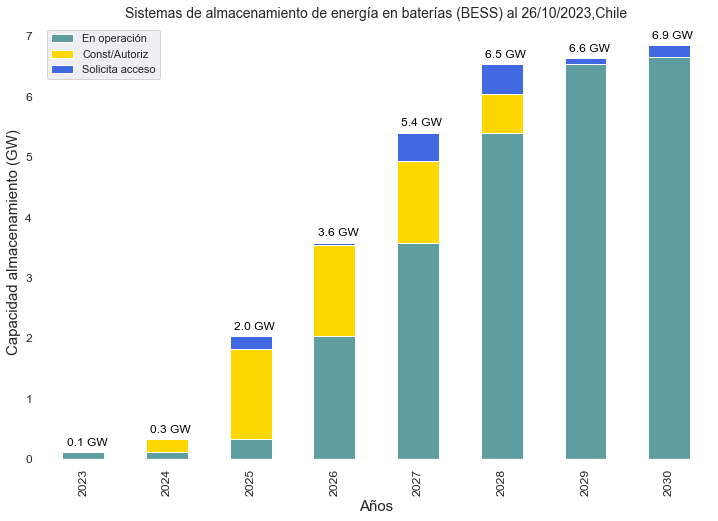

In [43]:
dataframe_final_grafico_acumulado
ax = dataframe_final_grafico_acumulado[['Operation','Const/Autoriz','request access']].plot(kind='bar',
    title = "Battery energy storage systems(BESS) at 10/26/2023,Chile",figsize=(12, 8),
    legend=True, fontsize=12,stacked=True,color = ['cadetblue','gold','royalblue'])
#mediumturquoise
xlabels = dataframe_final_grafico_acumulado.iloc[:,0]
ax.set_xticklabels(xlabels,fontsize=12.3)

ax.set_xlabel("Años", fontsize=15)
#ax.set_xlabel("Years", fontsize=15)

ax.set_ylabel("Capacidad almacenamiento (GW)", fontsize=15)
#ax.set_ylabel("BESS Capacity (GW)", fontsize=15)

ax.set_title("Sistemas de almacenamiento de energía en baterías (BESS) al 26/10/2023,Chile", fontsize=14)
#ax.set_title("Battery energy storage systems(BESS) at 10/26/2023,Chile", fontsize=14)


ax.legend(["En operación","Const/Autoriz","Solicita acceso"])



#Elimina las lineas de las filas y columnas del plot
ax.yaxis.grid()
ax.xaxis.grid()

#Ajusta el color del fondo
ax.set_facecolor('white')

#Agrega el texto en la parte superior de la barra:
addtext(xlabels,dataframe_final_grafico_acumulado.iloc[:,4])



In [44]:
dataframe_final_grafico_acumulado

,Year,Operation,Const/Autoriz,request access,Total
2023,2023,0.12,0.0012,0.0,0.12
2024,2024,0.1212,0.215,0.0,0.34
2025,2025,0.3362,1.487,0.209,2.03
2026,2026,2.0322,1.514,0.04,3.59
2027,2027,3.5862,1.35,0.472,5.41
2028,2028,5.4082,0.632,0.5,6.54
2029,2029,6.5402,0.0,0.1,6.64
2030,2030,6.6602,0.0,0.2,6.86


In [45]:
#promedio horas de operacion:
horas_BESS_solar = [3.0, 4.03, 4.3, 3.5, 5.1, 6.0]
horas_BESS_eolico = [6.00, 4.77 ]
all_horas_BESS = [3.0, 4.03, 4.3, 3.5, 5.1, 6.0,6.00,4.77]
print("Promedio horas de operación:",sum(all_horas_BESS)/8)

Promedio horas de operación: 4.5875


In [46]:
data_analisis_grafico#['Year_recepcion'].count()

#Recepción 2021:

filtro_recepcion_2021 = data_analisis_grafico.loc[data_analisis_grafico['Year_recepcion'] == 2023]
filtro_recepcion_2021['Year_recepcion'].count()
#2021: 3 proyectos.
#2022: 2 proyectos.
#2023: 55 proyectos.
print("Pocentaje solicitud 2023: ",(55/60)*100,"%")

Pocentaje solicitud 2023:  91.66666666666666 %


In [47]:
final_data_BESS.columns
puntos_conexion = final_data_BESS.groupby(["Región","Comuna","Punto de Conexión"])["Proyecto"].count() 

#print("Total de proyectos BESS:",sum(proyectos_por_empresa))

puntos_conexion

Región                                Comuna                Punto de Conexión                                  
Antofagasta                           Antofagasta           S/E Uribe 110 kV                                       1
                                      Maria Elena           S/E PE Quillagua 23 kV                                 1
                                                            S/E Sol del Desierto 33 kV                             1
                                                            S/E Valle del Sol 33 kV                                1
                                                            SE Crucero 220 kV                                      1
                                      Mejillones            S/E Cochrane 220 kV                                    1
                                                            S/E Muelle 23 kV                                       1
                                      San Pedro de Atacama  S/E Sol d

In [48]:
#PUNTOS QUE SE REPITEN:
#S/E Nueva Pozo Almonte 220 kV: 3 PROYECTOS.
#S/E Cumbre 220 kV : 2 proyectos.

In [49]:
#df con número de empresas/capacidad versión only bess
mayor_capacidad

,Número de proyectos BESS,Capacidad [MW]
Empresa Solicitante,,
oEnergy Development SpA,20,1195.0
Solarpack Chile Limitada,4,787.0
Colbún S.A.,2,440.0
BESS Pueblo Hundido SpA,1,405.0
BESS El Salado SpA.,1,405.0
Aes Chile Inversiones Renovables SpA,1,400.0
Enel Green Power del Sur,3,360.0
Punta del Sol SpA,1,300.0
CI NMF I Arena ProjectCo SpA,1,270.0


In [51]:
#df con proyectos/capacidad BESS+Solar
df_proyectos_capacidad_BESS_BESS_solar = pd.read_csv("tarea_2_csv/output_df_proyectos_capacidad_BESS_BESS_solar.csv",sep = ",")# error_bad_lines=False)
df_proyectos_capacidad_BESS_BESS_solar
#df con proyectos/capacidad BESS+wind
df_proyectos_capacidad_BESS_BESS_wind = pd.read_csv("tarea_2_csv/output_df_proyectos_capacidad_BESS_BESS_wind.csv",sep = ",")# error_bad_lines=False)
df_proyectos_capacidad_BESS_BESS_wind


,Empresa Solicitante,Número de proyectos BESS + Wind,Capacidad BESS (MW)
0,Guanaquiana SpA,1,70.0
1,Engie Energía Chile S.A.,1,63.0


In [52]:
#Merge de los datos:
df_merge_capacidad_empresa = pd.merge(mayor_capacidad,
                            df_proyectos_capacidad_BESS_BESS_solar,how = "outer",
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')

df_merge_capacidad_empresa_final = pd.merge(df_merge_capacidad_empresa,
                            df_proyectos_capacidad_BESS_BESS_wind,how = "outer",
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')

In [53]:
# Repalce NaN with zero on all columns 
df_cap_empresa_final = df_merge_capacidad_empresa_final.fillna(0)

df_cap_empresa_final['Total proyects'] = int()
for i in range(len(df_cap_empresa_final['Número de proyectos BESS'])):
    df_cap_empresa_final['Total proyects'][i] = (df_cap_empresa_final['Número de proyectos BESS'][i]+
                                                df_cap_empresa_final['Número de proyectos BESS + Solar'][i]+
                                                df_cap_empresa_final['Número de proyectos BESS + Wind'][i])
    
df_cap_empresa_final
#Ajusta nombre de las columnas:
df_cap_empresa_final.rename(columns={"Capacidad [MW]": "Capacity BESS[MW]",
                                    "Capacidad BESS (MW)_x":"Capacity hybrid BESS(solar)[MW]",
                                    "Capacidad BESS (MW)_y":"Capacity hybrid BESS(wind)[MW]"},inplace = True)


df_cap_empresa_final['Total_capacity_MW'] = float()
for i in range(len(df_cap_empresa_final['Número de proyectos BESS'])):
    df_cap_empresa_final['Total_capacity_MW'][i] = (df_cap_empresa_final['Capacity BESS[MW]'][i]+
                                                df_cap_empresa_final['Capacity hybrid BESS(solar)[MW]'][i]+
                                                df_cap_empresa_final['Capacity hybrid BESS(wind)[MW]'][i])



#ordena por mayor capacidad instalada: 
mayor_capacidad_df_cap_empresa_final = df_cap_empresa_final.sort_values('Total_capacity_MW',ascending=False)
#Reset index:
mayor_capacidad_df_cap_empresa_final = mayor_capacidad_df_cap_empresa_final.reset_index(drop=True)
mayor_capacidad_df_cap_empresa_final

,Empresa Solicitante,Número de proyectos BESS,Capacity BESS[MW],Número de proyectos BESS + Solar,Capacity hybrid BESS(solar)[MW],Número de proyectos BESS + Wind,Capacity hybrid BESS(wind)[MW],Total proyects,Total_capacity_MW
0,oEnergy Development SpA,20.0,1195.0,0.0,0.0,0.0,0.0,20,1195.0
1,Solarpack Chile Limitada,4.0,787.0,0.0,0.0,0.0,0.0,4,787.0
2,Enel Green Power del Sur,3.0,360.0,3.0,400.0,0.0,0.0,6,760.0
3,Colbún S.A.,2.0,440.0,0.0,0.0,0.0,0.0,2,440.0
4,BESS Pueblo Hundido SpA,1.0,405.0,0.0,0.0,0.0,0.0,1,405.0
5,BESS El Salado SpA.,1.0,405.0,0.0,0.0,0.0,0.0,1,405.0
6,Aes Chile Inversiones Renovables SpA,1.0,400.0,0.0,0.0,0.0,0.0,1,400.0
7,Punta del Sol SpA,1.0,300.0,0.0,0.0,0.0,0.0,1,300.0
8,CI NMF I Arena ProjectCo SpA,1.0,270.0,0.0,0.0,0.0,0.0,1,270.0
9,Grenergy Renovables Pacific Limitada,3.0,270.0,0.0,0.0,0.0,0.0,3,270.0


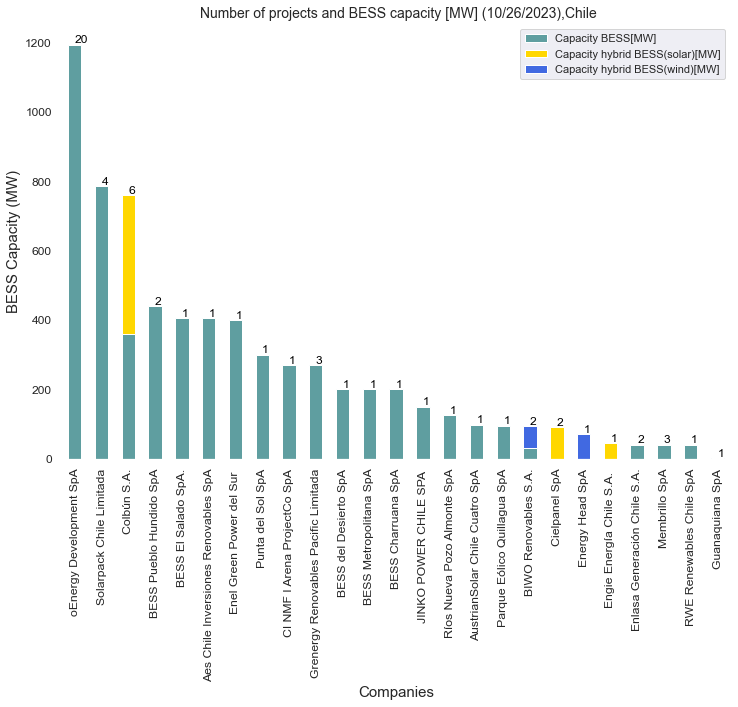

In [54]:

ax_empresa = mayor_capacidad_df_cap_empresa_final[['Capacity BESS[MW]','Capacity hybrid BESS(solar)[MW]','Capacity hybrid BESS(wind)[MW]']].plot(kind='bar',
    title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(12, 8),
    legend=True, fontsize=12,stacked=True,color = ['cadetblue','gold','royalblue'])
#mediumturquoise
xlabels_empresa = df_cap_empresa_final.iloc[:,0]
ax_empresa.set_xticklabels(xlabels_empresa,fontsize=12.3)
ax_empresa.set_xlabel("Companies", fontsize=15)
ax_empresa.set_ylabel("BESS Capacity (MW)", fontsize=15)
ax_empresa.set_title(" Number of projects and BESS capacity [MW] (10/26/2023),Chile", fontsize=14)



#Elimina las lineas de las filas y columnas del plot
ax_empresa.yaxis.grid()
ax_empresa.xaxis.grid()

#Ajusta el color del fondo
ax_empresa.set_facecolor('white')

def addtext_empresa(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+5,str(mayor_capacidad_df_cap_empresa_final.iloc[:,7][i]),color = 'black')

#Agrega el texto en la parte superior de la barra:
addtext_empresa(xlabels_empresa,mayor_capacidad_df_cap_empresa_final.iloc[:,8])

In [55]:
#Ahora, hagamos el mismo plot pero horizontal:

In [56]:
mayor_capacidad_df_cap_empresa_final_horizontal =mayor_capacidad_df_cap_empresa_final.sort_values('Total_capacity_MW',ascending=True)
#Reset index:
mayor_capacidad_df_cap_empresa_final_horizontal = mayor_capacidad_df_cap_empresa_final_horizontal.reset_index(drop=True)

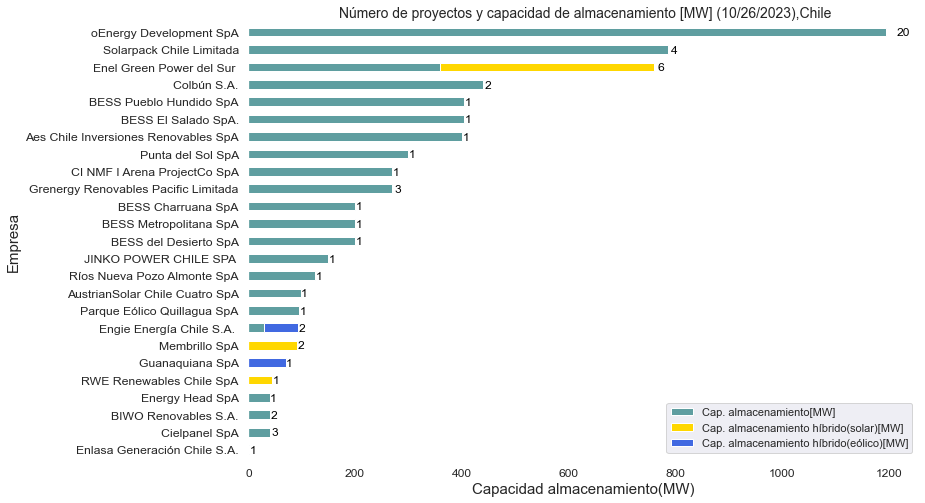

In [57]:
#x.plot(kind=‘barh’)

ax_empresa_2 = mayor_capacidad_df_cap_empresa_final_horizontal[['Capacity BESS[MW]','Capacity hybrid BESS(solar)[MW]','Capacity hybrid BESS(wind)[MW]']].plot(kind="barh",
                  title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(12, 8),
    legend=True, fontsize=12,stacked=True,color = ['cadetblue','gold','royalblue'])#


#mediumturquoise
xlabels_empresa_2 = mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,0]
#ax_empresa_2.set_xticklabels(xlabels_empresa_2,fontsize=12.3)
ax_empresa_2.set_yticklabels(xlabels_empresa_2,fontsize=12.3)

ax_empresa_2.set_xlabel("Capacidad almacenamiento(MW)", fontsize=15)
#ax_empresa_2.set_xlabel("BESS Capacity (MW)", fontsize=15)

ax_empresa_2.set_ylabel("Empresa", fontsize=15)
#ax_empresa_2.set_ylabel("Companies", fontsize=15)


ax_empresa_2.set_title(" Número de proyectos y capacidad de almacenamiento [MW] (10/26/2023),Chile", fontsize=14)
#ax_empresa_2.set_title(" Number of projects and BESS capacity [MW] (10/26/2023),Chile", fontsize=14)

ax_empresa_2.legend(["Cap. almacenamiento[MW]","Cap. almacenamiento híbrido(solar)[MW]","Cap. almacenamiento híbrido(eólico)[MW]"])

#Elimina las lineas de las filas y columnas del plot
ax_empresa_2.yaxis.grid()
ax_empresa_2.xaxis.grid()

#Ajusta el color del fondo
ax_empresa_2.set_facecolor('white')


#def addtext_empresa_3(x,y):
#    for i in range(len(x)):
#        #plt.text(i,y[i]+5,str(mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7][i]),color = 'black')
#        plt.text(y[i]+0.1,i,str(df_estado_solicitud['Number of projects'][i]),color = 'black',
#                fontsize=14)
#
##Agrega el texto en la parte superior de la barra:
#addtext_empresa_3(xlabels_empresa_2,mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,8])


def addtext_empresa_2(x,y):
    for i in range(len(x)):
        #plt.text(i,y[i]+5,str(mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7][i]),color = 'black')
        plt.text(y[i]+mayor_capacidad_df_cap_empresa_final_horizontal['Total_capacity_MW'][i],i-0.2,str(mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7][i]),color = 'black')


#y[i]+0.1,i

#ORIGINAL
#y[i]+50,len(x)-i-1.2

#Agrega el texto en la parte superior de la barra:
addtext_empresa_2(xlabels_empresa_2,mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7])
#
#mayor_capacidad_df_cap_empresa_final_horizontal#.iloc[:,7]
#plt.text(mayor_capacidad_df_cap_empresa_final.iloc[:,8][0],0,str(mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7][0]),color = 'black')

In [58]:
mayor_capacidad_df_cap_empresa_final_horizontal

,Empresa Solicitante,Número de proyectos BESS,Capacity BESS[MW],Número de proyectos BESS + Solar,Capacity hybrid BESS(solar)[MW],Número de proyectos BESS + Wind,Capacity hybrid BESS(wind)[MW],Total proyects,Total_capacity_MW
0,Enlasa Generación Chile S.A.,1.0,1.2,0.0,0.0,0.0,0.0,1,1.2
1,Cielpanel SpA,3.0,40.0,0.0,0.0,0.0,0.0,3,40.0
2,BIWO Renovables S.A.,2.0,40.0,0.0,0.0,0.0,0.0,2,40.0
3,Energy Head SpA,1.0,40.0,0.0,0.0,0.0,0.0,1,40.0
4,RWE Renewables Chile SpA,0.0,0.0,1.0,45.0,0.0,0.0,1,45.0
5,Guanaquiana SpA,0.0,0.0,0.0,0.0,1.0,70.0,1,70.0
6,Membrillo SpA,0.0,0.0,2.0,91.0,0.0,0.0,2,91.0
7,Engie Energía Chile S.A.,1.0,30.0,0.0,0.0,1.0,63.0,2,93.0
8,Parque Eólico Quillagua SpA,1.0,95.0,0.0,0.0,0.0,0.0,1,95.0
9,AustrianSolar Chile Cuatro SpA,1.0,98.0,0.0,0.0,0.0,0.0,1,98.0


In [59]:
#Base de datos con 60 plantas BESS:

In [60]:
#Base de datos con 60 plantas BESS:
#final_data_BESS_filtrado['Estado Solicitud'].unique()
estado_solicitud = final_data_BESS.groupby(["Estado Solicitud"])["Proyecto"].count()
estado_solicitud

#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_estado_solicitud = pd.DataFrame(estado_solicitud)
df_estado_solicitud
###Elimina la fila "Solicitud ingresada", puesto que está duplicada.
###Se suma posteriormente a la fila que queda el # de proyectos.
### Numero de proyectos: 3
df_estado_solicitud.drop(["Solicitud ingresada"], axis=0, inplace=True)

##Elimina la fila "Proyecto Autorizado para Declararse en Construcción", puesto que está duplicada.
##Se suma posteriormente a la fila que queda el # de proyectos.
## Numero de proyectos: 4
df_estado_solicitud.drop(["Proyecto Autorizado para Declararse en Construcción"], axis=0, inplace=True)
#

In [61]:
sum(df_estado_solicitud['Proyecto'])

53

In [62]:
#Suma los 2 proyectos a la fila que queda de solicitud ingresada
df_estado_solicitud['Proyecto'][13] = 8
df_estado_solicitud
#Suma los 4 proyectos a la fila que queda de solicitud ingresada
df_estado_solicitud['Proyecto'][8] = 10
df_estado_solicitud
df_estado_solicitud.rename(columns={"Proyecto": "Number of projects"},inplace = True)


In [63]:
sum(df_estado_solicitud['Number of projects'])

60

In [64]:
df_estado_solicitud
#Ordena la información de forma descendente en función de la capacidad instalada.
df_estado_solicitud = df_estado_solicitud.sort_values('Number of projects',ascending=True)
df_estado_solicitud

# Change the row indexes
#df_estado_solicitud.index = ['Detained awaiting technical information from the owner of the facility',
#            'Preparation of Preliminary Connection Authorization Report',
#            'Project declared under construction', 'Project submitted',
#           "Background review","Admissibility Evaluation","Project qualified as reliable",
#           "Project authorized to be declared under construction","Stopped awaiting engineering definition of the project",
#           "Evaluation of background and/or requirements","Comments on the preliminary CTD report",
#           "Application submitted","Development of studies and/or background",
#           "Hearing and additional background"]

,Number of projects
Estado Solicitud,
Detenida a la espera de información técnica del propietario de la instalación,1
Elaboración Informe de Autorización de Conexión Preliminar,1
Proyecto declarado en construccion,1
Proyecto ingresado,1
Revisión de antecedentes,1
Evaluación Admisibilidad,2
Proyecto calificado como fehaciente,2
Observaciones al informe CTD preliminar,4
Detenida a la espera de definición de ingeniería de la obra,5


In [65]:
sum(df_estado_solicitud['Number of projects'])

60

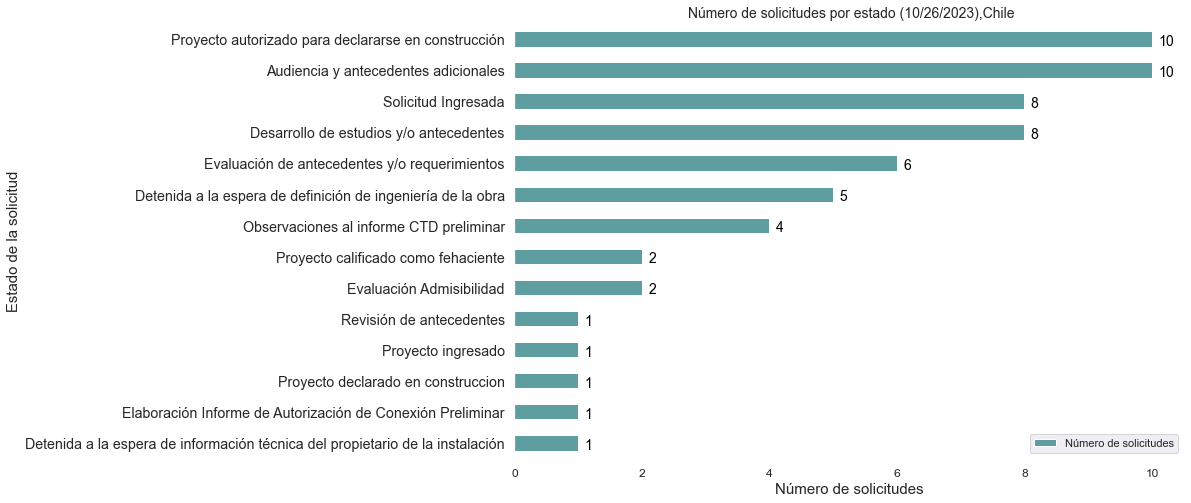

In [66]:
ax_empresa_3 = df_estado_solicitud.plot(kind="barh",
                  title = "Enterprice energy storage systems(BESS) at 10/26/2023,Chile",figsize=(12, 8),
    legend=True, fontsize=12,stacked=False,color = ['cadetblue'])#


#mediumturquoise
xlabels_empresa_3 = df_estado_solicitud.index
#ax_empresa_2.set_xticklabels(xlabels_empresa_2,fontsize=12.3)
ax_empresa_3.set_yticklabels(xlabels_empresa_3,fontsize=14.3)

ax_empresa_3.set_xlabel("Número de solicitudes", fontsize=15)
#ax_empresa_3.set_xlabel("Number of requests", fontsize=15)

ax_empresa_3.set_ylabel("Estado de la solicitud", fontsize=15)
#ax_empresa_3.set_ylabel("Request status", fontsize=15)

ax_empresa_3.set_title(" Número de solicitudes por estado (10/26/2023),Chile", fontsize=14)

ax_empresa_3.legend(["Número de solicitudes"])


#Elimina las lineas de las filas y columnas del plot
ax_empresa_3.yaxis.grid()
ax_empresa_3.xaxis.grid()

#Ajusta el color del fondo
ax_empresa_3.set_facecolor('white')


def addtext_empresa_3(x,y):
    for i in range(len(x)):
        #plt.text(i,y[i]+5,str(mayor_capacidad_df_cap_empresa_final_horizontal.iloc[:,7][i]),color = 'black')
        plt.text(y[i]+0.1,i-0.2,str(df_estado_solicitud['Number of projects'][i]),color = 'black',
                fontsize=14)

#Agrega el texto en la parte superior de la barra:
addtext_empresa_3(xlabels_empresa_3,df_estado_solicitud['Number of projects'])

In [67]:
df_estado_solicitud#['Number of projects']

,Number of projects
Estado Solicitud,
Detenida a la espera de información técnica del propietario de la instalación,1
Elaboración Informe de Autorización de Conexión Preliminar,1
Proyecto declarado en construccion,1
Proyecto ingresado,1
Revisión de antecedentes,1
Evaluación Admisibilidad,2
Proyecto calificado como fehaciente,2
Observaciones al informe CTD preliminar,4
Detenida a la espera de definición de ingeniería de la obra,5


In [68]:
#mediumturquoise
xlabels_empresa_3 = df_estado_solicitud.iloc[:,0]
xlabels_empresa_3
df_estado_solicitud.index

Index(['Detenida a la espera de información técnica del propietario de la instalación',
       'Elaboración Informe de Autorización de Conexión Preliminar',
       'Proyecto declarado en construccion', 'Proyecto ingresado',
       'Revisión de antecedentes', 'Evaluación Admisibilidad',
       'Proyecto calificado como fehaciente',
       'Observaciones al informe CTD preliminar',
       'Detenida a la espera de definición de ingeniería de la obra',
       'Evaluación de antecedentes y/o requerimientos',
       'Desarrollo de estudios y/o antecedentes', 'Solicitud Ingresada',
       'Audiencia y antecedentes adicionales',
       'Proyecto autorizado para declararse en construcción'],
      dtype='object', name='Estado Solicitud')